In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('clean_tweets.csv')

In [45]:
df.head()

,Unnamed: 0,sentiment,text
0,0,0,awww that s a bummer you shoulda got david car...
1,1,0,is upset that he can not update his facebook b...
2,2,0,i dived many times for the ball managed to sav...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,no it s not behaving at all i m mad why am i h...


In [46]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [47]:
df.describe()

,sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [49]:
df[df['text'].isnull()].count()

sentiment    3286
text            0
dtype: int64

In [50]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
df2 = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols)

In [51]:
df2.iloc[df[df['text'].isnull()].index].head()

,sentiment,id,date,query_string,user,text
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
1011,0,1468061127,Mon Apr 06 23:30:23 PDT 2009,NO_QUERY,gabysslave,@citizensheep


Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [52]:
df.dropna(inplace=True)

In [53]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1596714 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# Text Visualisation

### Word Cloud

In [69]:
from wordcloud import WordCloud

In [70]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, 
                      max_font_size=40, random_state=42).generate(str(df['text']))

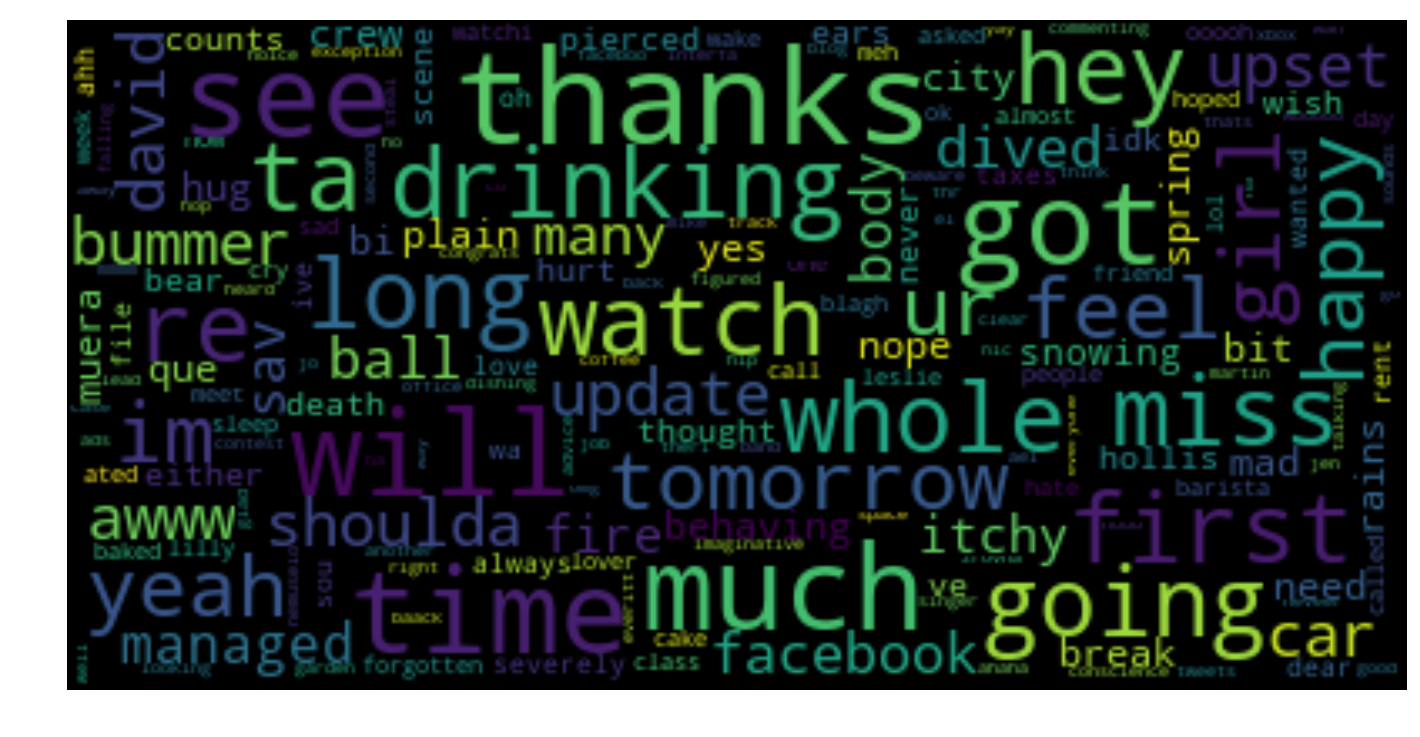

In [71]:
fig = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

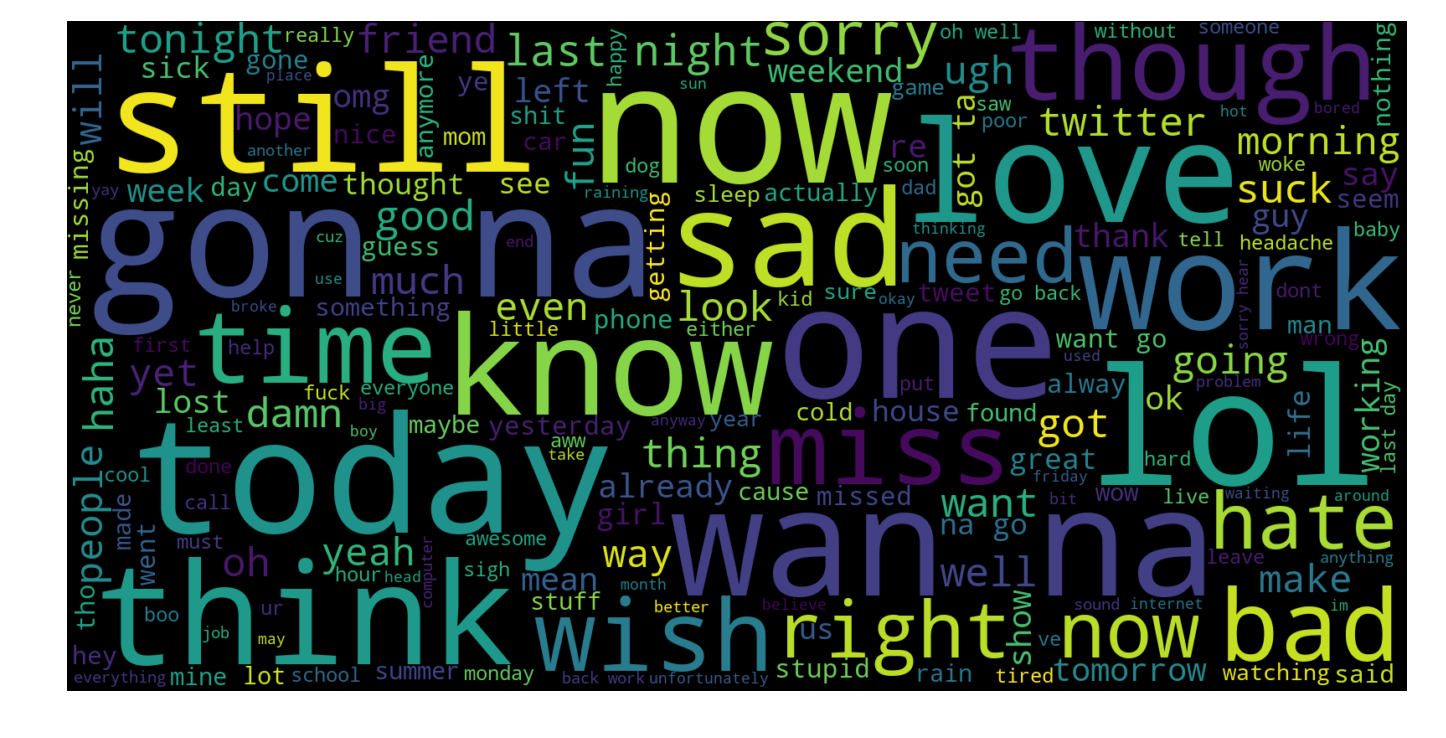

In [76]:
negative_tweets = df[df['sentiment']==0]

neg_tweet = []
for tweet in negative_tweets.text:
    neg_tweet.append(tweet)
neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
plt.figure(figsize=(12,10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

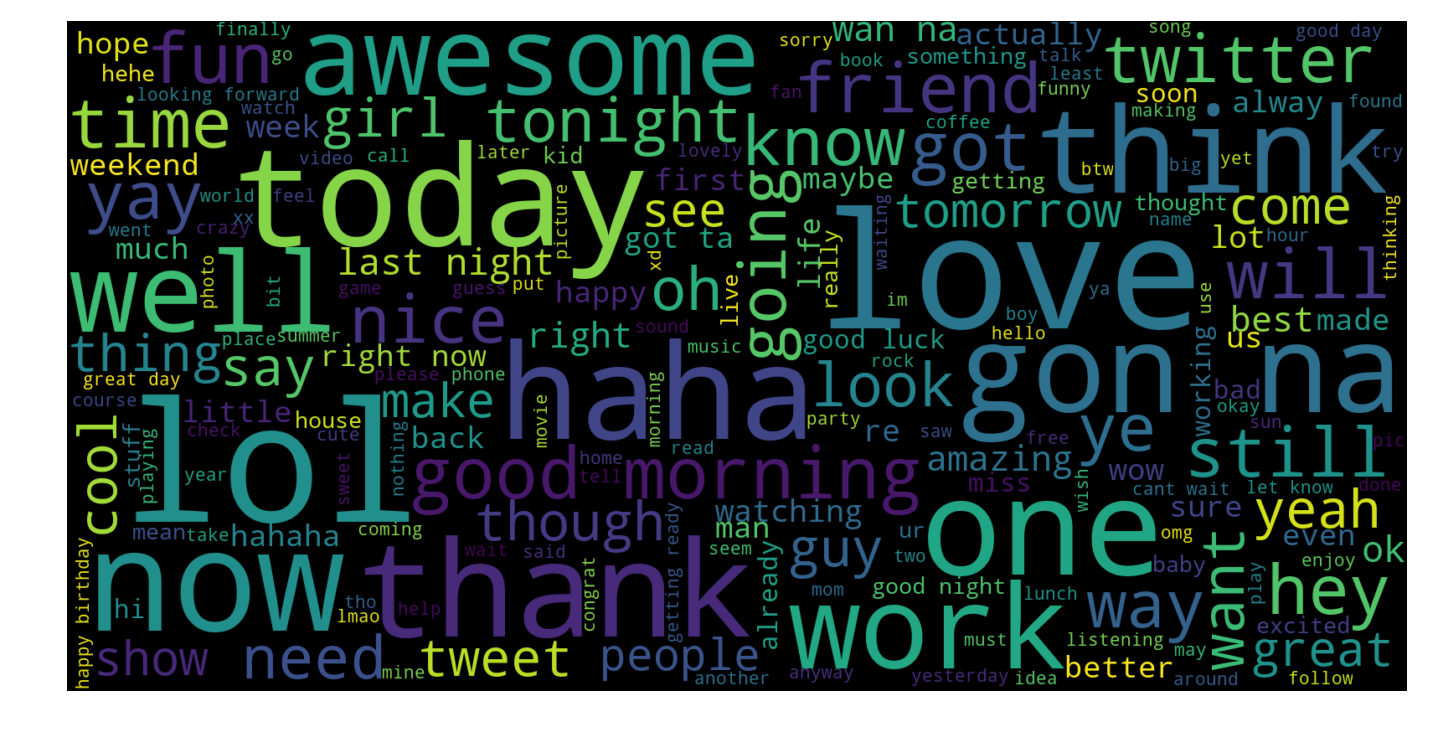

In [77]:
positive_tweets = df[df['sentiment']==1]

pos_tweet = []
for tweet in positive_tweets.text:
    pos_tweet.append(tweet)
pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
plt.figure(figsize=(12,10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()